In [4]:
pip install prophet


  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5b/a0/a0f4a556dff2189bc08d0f69f0d4aac1b7e4e0cedc9a70b30a134f73d100/cmdstanpy-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/91/7a/2c5c043e4a7cff3dbab6b0f3a79b492e76c7dc1a06f309897509c9d467f5/holidays-0.44-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/de/79/7ad3b2831247db4f61e781f9164147b1ee20205c5230dcd177021caa266b/importlib_resources-6.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for stanio~=0.3.0 from https://files.pythonhosted.org/packages/26/01/e2579afa3ad1eade8b54bf5b9e45790d219681b1f8f97edbd2f

In [5]:
import pandas as pd
from prophet import Prophet

In [6]:
# load csv file

df = pd.read_csv('Data/Ladesaeulenregister_v3.csv', sep=';' ,encoding='iso-8859-1', on_bad_lines='skip')

In [7]:
# change the string datetime to actual datetime

df['ds'] =  pd.to_datetime(df['Inbetriebnahmedatum'], dayfirst=True)

In [8]:
# set the datetime as new index in the df

df = df.set_index(df['ds'])

In [9]:
# add a row with 1 as counter for the groupby function

df['y'] = 1

In [10]:
# save the result of the groupby function to a new df

df2 = df['y'].groupby(pd.Grouper(freq='M')).sum()

In [11]:
df2.head()

ds
1992-10-31    1
1992-11-30    0
1992-12-31    0
1993-01-31    0
1993-02-28    0
Freq: M, Name: y, dtype: int64

In [12]:
# reset the index to positions

df2 = df2.reset_index()

In [13]:
# slice of df2 was used to get rid of a timeframe where zero infrastucture was build

df3 = df2[200:370]

17:52:51 - cmdstanpy - INFO - Chain [1] start processing
17:52:51 - cmdstanpy - INFO - Chain [1] done processing


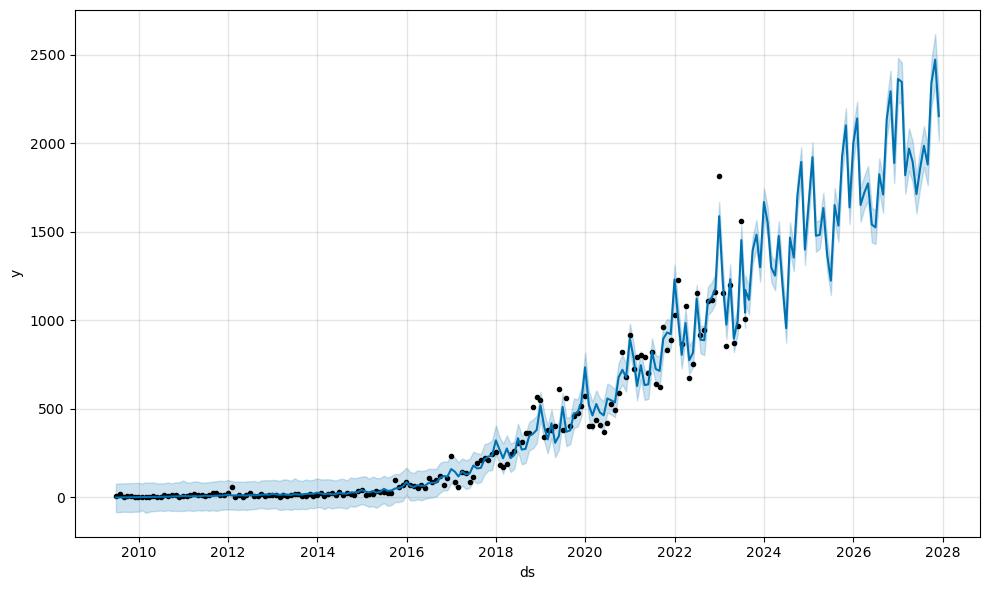

In [14]:
m = Prophet(seasonality_mode='multiplicative').fit(df3)
future = m.make_future_dataframe(periods=53, freq='MS')
fcst = m.predict(future)
fig = m.plot(fcst)